In [79]:
### header
%matplotlib inline

import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import calendar
from collections import Counter

### import and read file
### CHANGE: this to your file
with open("../Jupyter/chat.txt") as f:
    content = f.readlines()

# strip \n characters
content = [x.strip() for x in content]


In [80]:
### format text input
def groupLine(line):
    res = re.search("(\d+.\d+.\d+), (\d+:\d+) - (\w+\s?\w*): (.*)", line)
    
    if res:
        return list(res.groups())
    else:
        # all belong to previous one
        #print(line)
        return [0,0,0,line]

# group and convert to list to make it mutable    
grouped = list(map(groupLine, content))

# merge (0,0,0, text) back into previous ones
for idx, item in reversed(list(enumerate(grouped))):
    if 0 in item:
        grouped[idx-1][3] += " " + item[3]
        
# delete 0 elements
removed = list(filter(lambda x: x[0]!=0, grouped))

# datestring to date
from datetime import datetime
# removed format [date, time, name, text]
def datestr2date(item):
    return [datetime.strptime(item[0],'%d.%m.%y'), 
            datetime.strptime(item[1],'%H:%M'), 
            item[2], item[3]]

# texts format [date, time, name, text]
texts = list(map(datestr2date, removed))

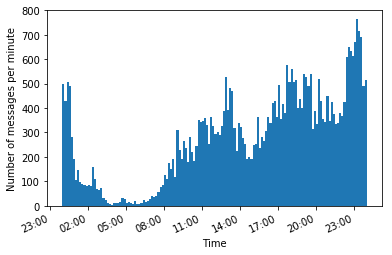

In [81]:
### total per daytime
values = [x[1] for x in texts]
      
plt.hist(values, bins=24*6)
plt.xlabel("Time")
plt.ylabel("Number of messages per minute")
formatter = dates.DateFormatter('%H:%M')
ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=25)

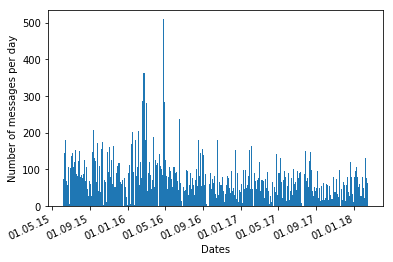

In [82]:
### total per day
values = [x[0] for x in texts]

plt.hist(values, bins=500)
plt.xlabel("Dates")
plt.ylabel("Number of messages per day")
formatter = dates.DateFormatter('%d.%m.%y')
ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=25)

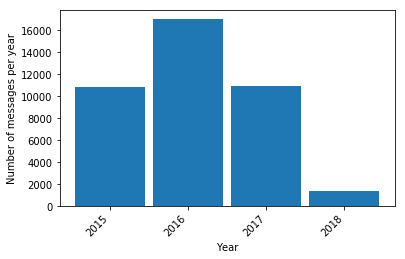

In [83]:
### total per weekday

# number of messages per weekday
msg_per_weekday = Counter(list(map(lambda x: x[0].year, texts)))

labels, values = zip(*sorted(msg_per_weekday.items()))

indexes = range(len(labels))

# plot 
width = .9
plt.bar(indexes, values, width)
plt.xlabel("Year")
plt.ylabel("Number of messages per year")
plt.xticks(indexes, labels)
plt.gcf().autofmt_xdate(rotation=45)

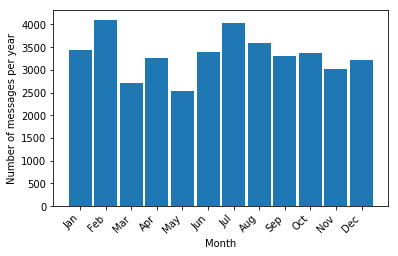

In [84]:
### total per month

# number of messages per weekday
msg_per_month = Counter(list(map(lambda x: x[0].month , texts)))

labels, values = zip(*sorted(msg_per_month.items()))

# since labels are already a range, use them
indexes = labels

# plot 
width = .9
plt.bar(indexes, values, width)
plt.xlabel("Month")
plt.ylabel("Number of messages per year")
plt.xticks(indexes, list(map(lambda x: calendar.month_abbr[x], indexes)))
plt.gcf().autofmt_xdate(rotation=45)

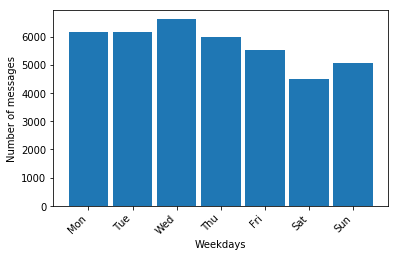

In [85]:
### total per weekday

# number of messages per weekday
msg_per_weekday = Counter(list(map(lambda x: x[0].weekday(), texts)))

labels, values = zip(*sorted(msg_per_weekday.items()))

# since labels are already a range, use them
indexes = labels

# plot 
width = .9
plt.bar(indexes, values, width)
plt.xlabel("Weekdays")
plt.ylabel("Number of messages")
plt.xticks(indexes, list(map(lambda x: calendar.day_abbr[x], indexes)))
plt.gcf().autofmt_xdate(rotation=45)

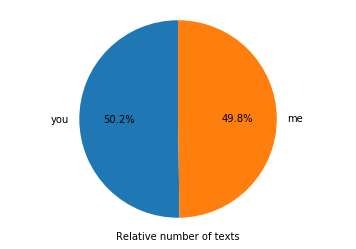

In [86]:
### percentage of person
total_per_name = Counter(list(map(lambda x: x[2], texts)))
labels, values = zip(*total_per_name.items())

### CHANGE: change this to your names, make sure to find who is first/second in the list
### alternatively just replace used_labels below with labels so that your names appear
used_labels = ['you', 'me']

plt.figure(0)
plt.pie(values,
        labels=used_labels,
        autopct='%1.1f%%', 
        startangle=90)
plt.axis('equal') #ensure pie is round
plt.xlabel('Relative number of texts');

In [87]:
# top words
from IPython.display import display, Markdown, Latex
from statistics import mean

# number of total messages
totalmsg = len(texts)

# timespan
timespan = texts[-1][0] - texts[0][0]

# average number of words per day
msg_per_day = Counter(list(map(lambda x: x[0], texts)))
mean_msg_per_day = mean(msg_per_day.values())

# join all texts together and then split words
# also filter for <Medien ...> and Verpasster Sprach/Videoanruf
### CHANGE: Replace the following three strings with the respecitve ones in your language
filter_list = ['<Medien weggelassen>', 'Verpasster Sprachanruf', 'Verpasster Videoanruf']
filter_whatsapp = lambda x: not any(s in x for s in filter_list)

raw_text = list(map(lambda x: x[3], texts))
filtered_text = [line for line in raw_text if filter_whatsapp(line)]

# average word length
av_wordlength = mean([len(el.split()) for el in filtered_text])

word_occurence = Counter(" ".join(filtered_text).split())


print('Timespan: ' + str(timespan.days) + ' days')
print('Average number of texts per day: ' + "{:1.2f}".format(mean_msg_per_day))
print('Average word length: ' + '{:1.2f}'.format(av_wordlength))
print('Total number of texts: ' + str(totalmsg))

display(Markdown('### Most used words:'))
#print(word_occurence.most_common(10))
for e in word_occurence.most_common(10):
    print(str(e[0]) + ' (' + str(e[1]) + 'x), ', end='') 
print(' ...')


Timespan: 983 days
Average number of texts per day: 43.38
Average word length: 5.26
Total number of texts: 39998


### Most used words:

und (3451x), isch (2055x), so (1943x), ja (1839x), aber (1787x), ned (1775x), du (1696x), denn (1635x), ich (1605x), das (1544x),  ...
